In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Helpfulness analysis

In [33]:
# Importing Data with Features 
data_hedonic_raw = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/2 FeaturePreperation/Data_with_Features/Final Data/Hedonic_Final_Cleaned.csv')
data_utilitarian_raw = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/2 FeaturePreperation/Data_with_Features/Final Data/Utilitarian_Final_Cleaned.csv')

In [34]:
# Combining data in one dataframe
data= pd.concat([data_hedonic_raw, data_utilitarian_raw])

# Filtering for helpful reviews only
data_helpful = data[data['helpful_vote'] != 0]


In [35]:
# Create 'Helpful_Code' column based on 'helpful_vote'
data_utilitarian_raw['Helpful_Code'] = (data_utilitarian_raw['helpful_vote'] > 0).astype(int)
data_hedonic_raw['Helpful_Code'] = (data_hedonic_raw['helpful_vote'] > 0).astype(int)

data['Helpful_Code'] = (data['helpful_vote'] > 0).astype(int)

In [36]:
# Create 'Product Type' column based on 'prod_type' to transform numerical values into categorical values
data ['Product type'] = data['prod_type'].replace({0: 'Hedonic', 1: 'Utilitarian'})

# 1. Methods for analysis

In [6]:
# Function Building for analyzing the helpful Review by product type
def plot_votes_by_product_type(data):
    # Get unique product types
    product_types = data['Prod'].unique()

    # Initialize lists to store counts of helpful and unhelpful reviews for each product type
    not_helpful_votes_counts = []
    helpful_votes_counts = []

    # Calculate counts for each product type
    for product_type in product_types:
        # Count of rows where Helpful Review < 0 for the current product type
        not_helpful_votes_count = data[(data['Prod'] == product_type) & (data['Helpful_Code'] == 0)].shape[0]
        not_helpful_votes_counts.append(not_helpful_votes_count)

        # Count of rows where Helpful Review are > 0 for the current product type
        helpful_votes_count = data[(data['Prod'] == product_type) & (data['Helpful_Code'] > 0)].shape[0]
        helpful_votes_counts.append(helpful_votes_count)

    # Plotting the data
    plot_data = pd.DataFrame({
        'Prod': product_types,
        'Unhelpful Review': not_helpful_votes_counts,
        'Helpful Review': helpful_votes_counts
    })

    plot_data = plot_data.melt(id_vars='Prod', var_name='Vote Type', value_name='Count')
    plt.figure(figsize=(12, 6), dpi=800)
    ax = sns.barplot(x='Prod', y='Count', hue='Vote Type', data=plot_data,edgecolor="black", palette={'Unhelpful Review': sns.xkcd_rgb['amber'], 'Helpful Review': sns.xkcd_rgb['faded green']})

    for i in ax.containers:
         ax.bar_label(i,)

    plt.xlabel('Product')
    plt.ylabel('Count')
    plt.title('Distribution of helpful reviews across product categories')
    plt.legend(title='Vote Type')
    plt.show()

In [7]:
#Function for calculating the review counts by product type/Helpful Review 
def calculate_review_counts(data, category_column='Prod'):
    # Get unique categories
    categories = data[category_column].unique()

    # Initialize lists to store counts and categories
    categories_list = []
    not_helpful_votes_counts = []
    helpful_votes_counts = []
    total_reviews_counts = []

    # Calculate counts for each category
    for category in categories:
        # Check if the category exists in the DataFrame
        if category not in data[category_column].values:
            print(f"Category '{category}' not found in the DataFrame.")
            continue
        
        # Count of rows where Helpful Review are zero for the current category
        not_helpful_votes_count = data[(data[category_column] == category) & (data['helpful_vote'] == 0)].shape[0]
        not_helpful_votes_counts.append(not_helpful_votes_count)
        
        # Count of rows where Helpful Review are greater than zero for the current category
        helpful_votes_count = data[(data[category_column] == category) & (data['helpful_vote'] > 0)].shape[0]
        helpful_votes_counts.append(helpful_votes_count)
        
        # Append category to the list for DataFrame creation
        categories_list.append(category)

        # Total number of reviews for the current category
        total_reviews_count = not_helpful_votes_count + helpful_votes_count
        total_reviews_counts.append(total_reviews_count)

    # Calculate percentage of Helpful Review
    total_votes_counts = [not_h + h for not_h, h in zip(not_helpful_votes_counts, helpful_votes_counts)]
    helpful_vote_percentages = [(h / total) * 100 if total != 0 else 0 for h, total in zip(helpful_votes_counts, total_votes_counts)]

    # Calculate percentage of Unhelpful Review
    unhelpful_vote_percentages = [(not_h / total) * 100 if total != 0 else 0 for not_h, total in zip(not_helpful_votes_counts, total_reviews_counts)]
    
    # Create DataFrame to store results
    counts_df = pd.DataFrame({
        category_column.capitalize(): categories_list,
        'Unhelpful Reviews': not_helpful_votes_counts,
        'Helpful Reviews': helpful_votes_counts,
        'Total Reviews': total_reviews_counts,
        'Helpful Review Ratio': helpful_vote_percentages,
        'Unhelpful Review Ratio': unhelpful_vote_percentages
    })

    # Return the DataFrame
    return(counts_df)


# 2. Helpfulness Analysis

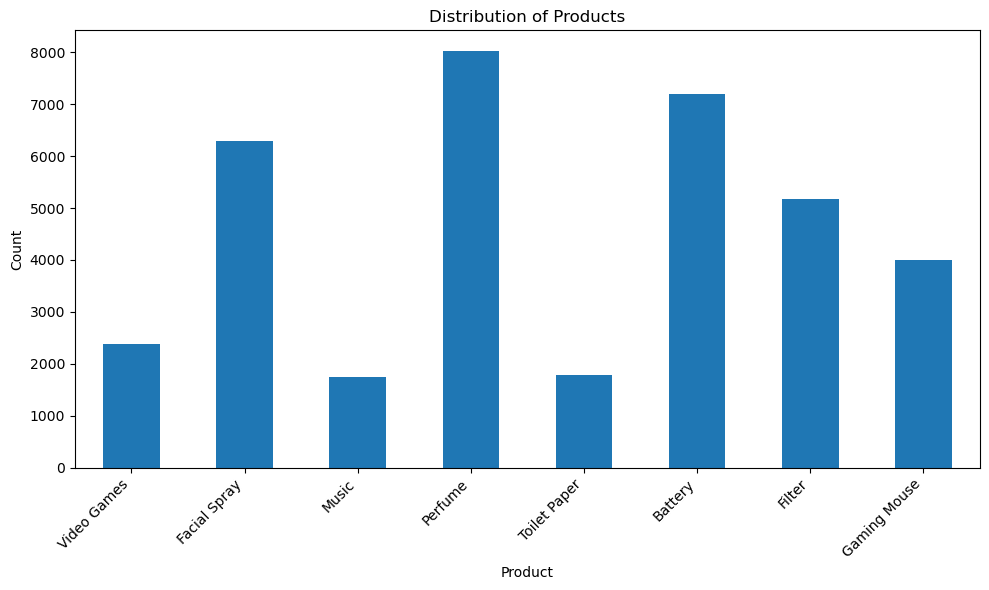

In [8]:
# Get overview about product distribution within the data of helpful reviews

# Get the unique products
unique_products = data['Prod'].unique()

# Count the number of reviews for each product and plot the distribution
product_counts = data['Prod'].value_counts().reindex(unique_products, fill_value=0)
plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar')
plt.title('Distribution of Products')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

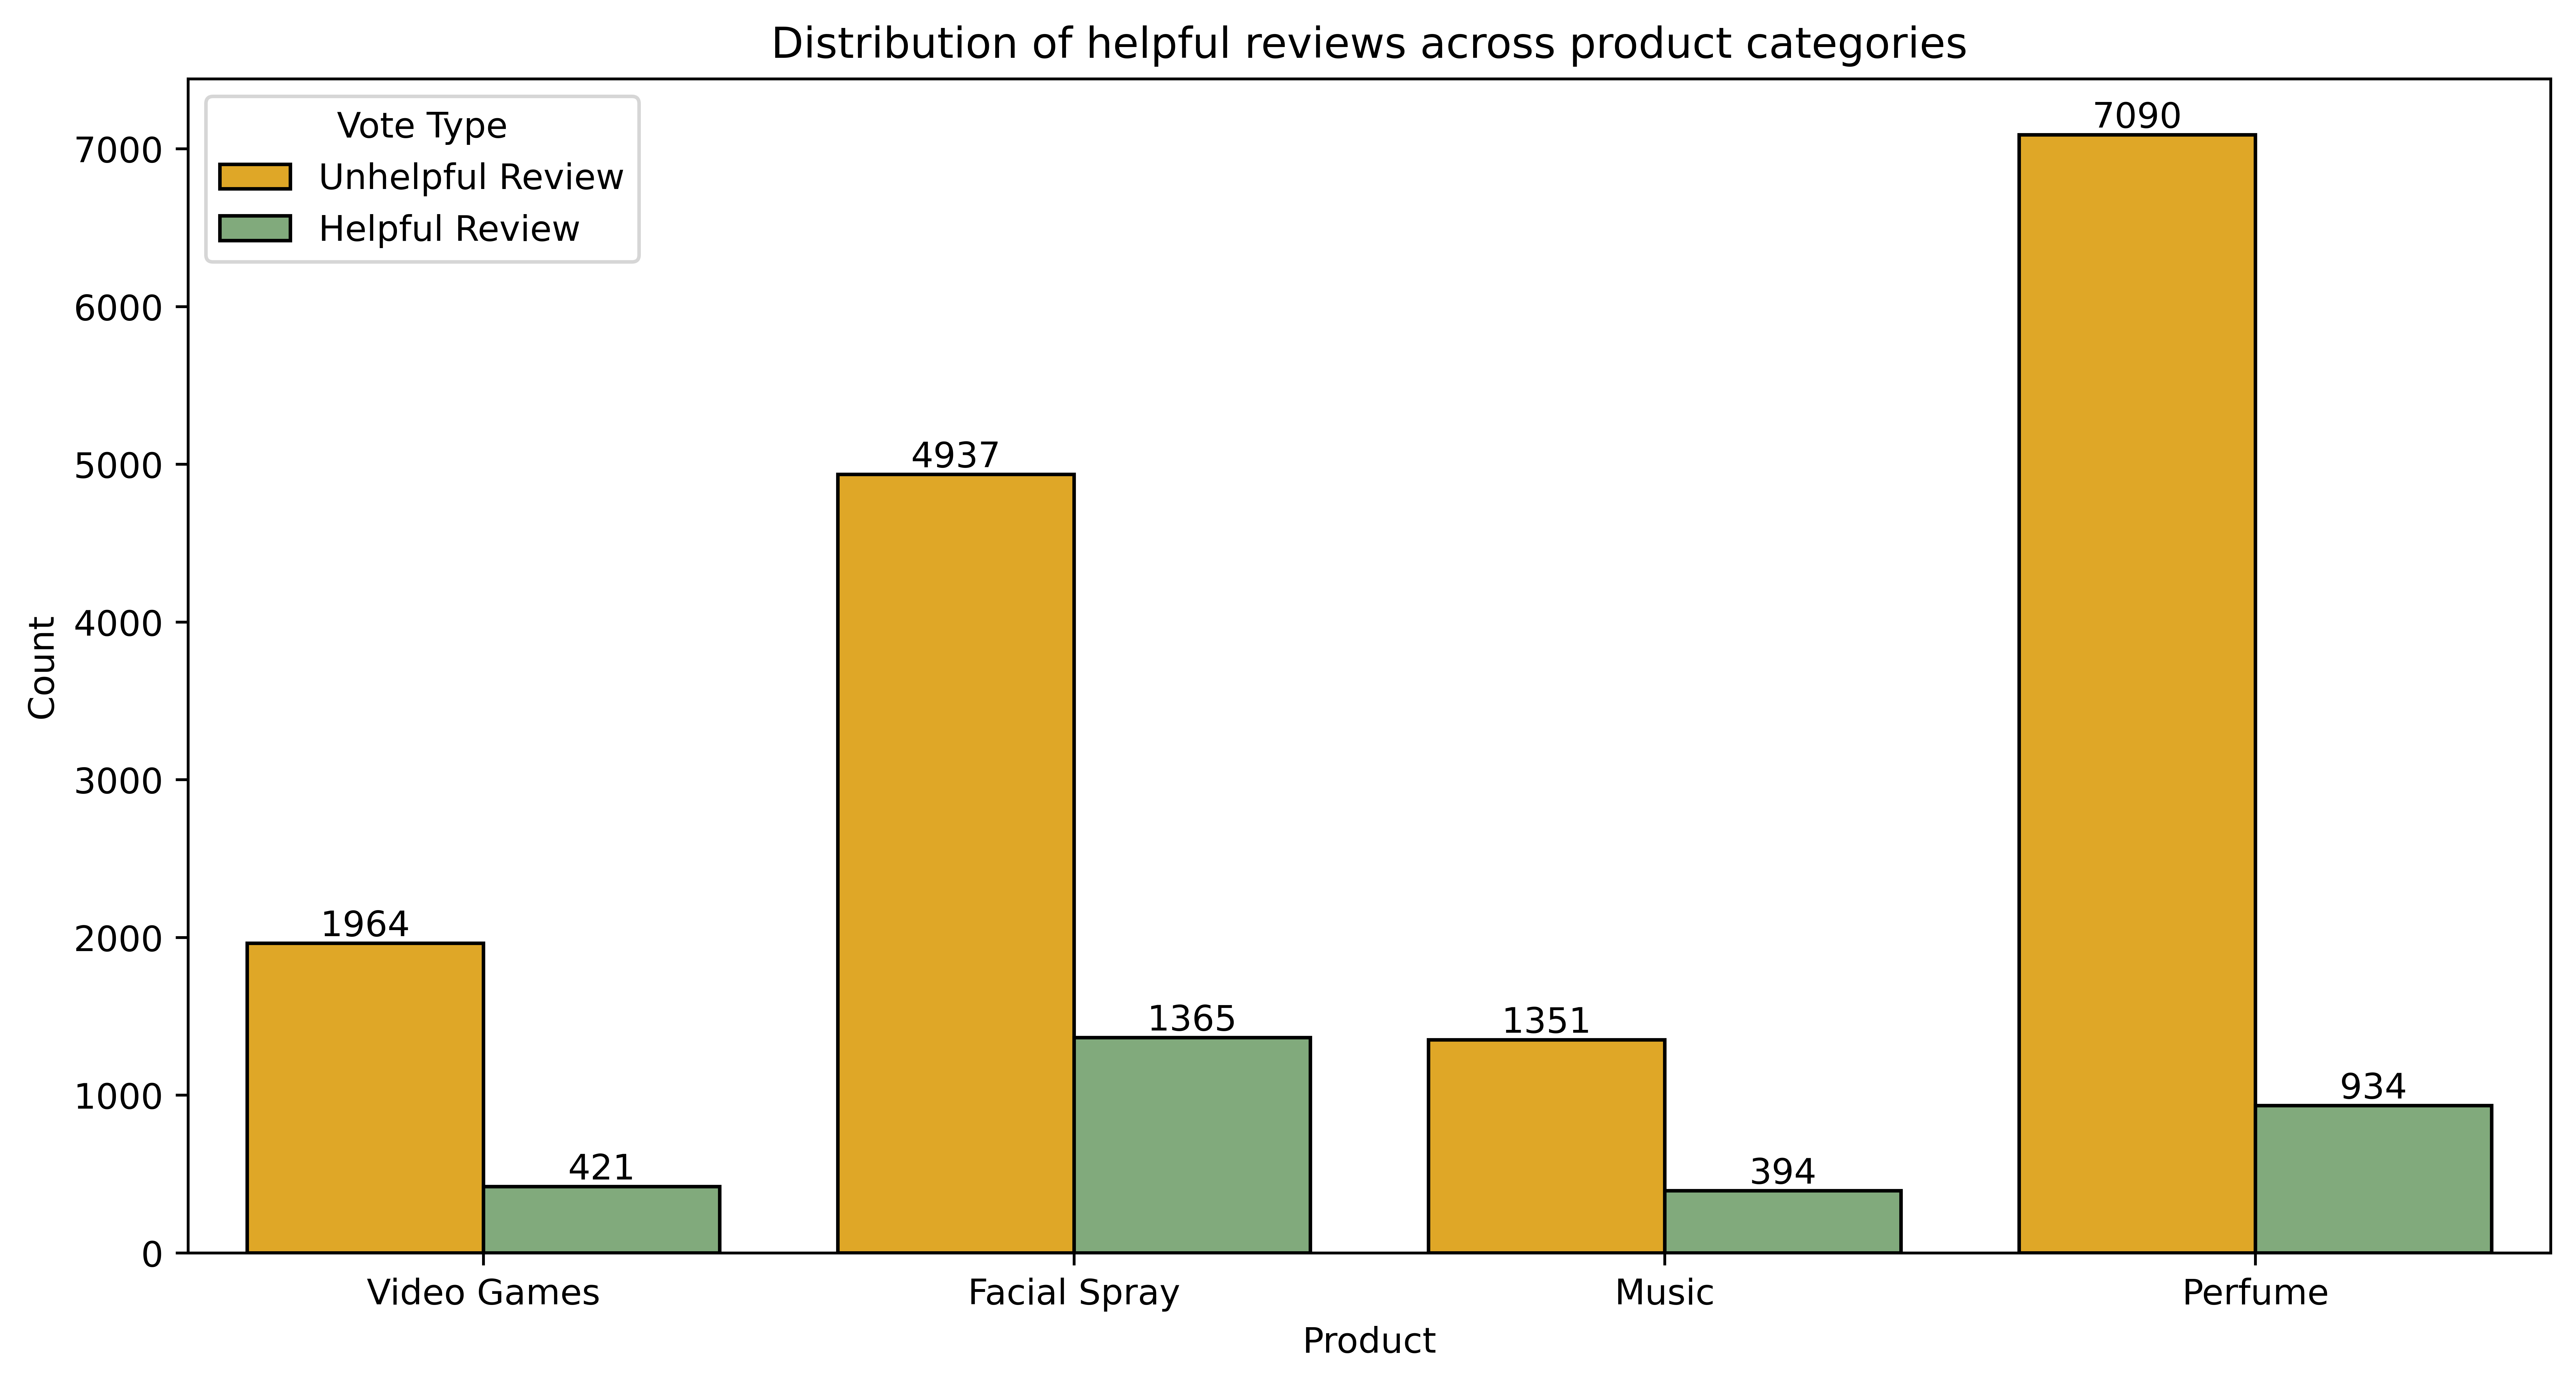

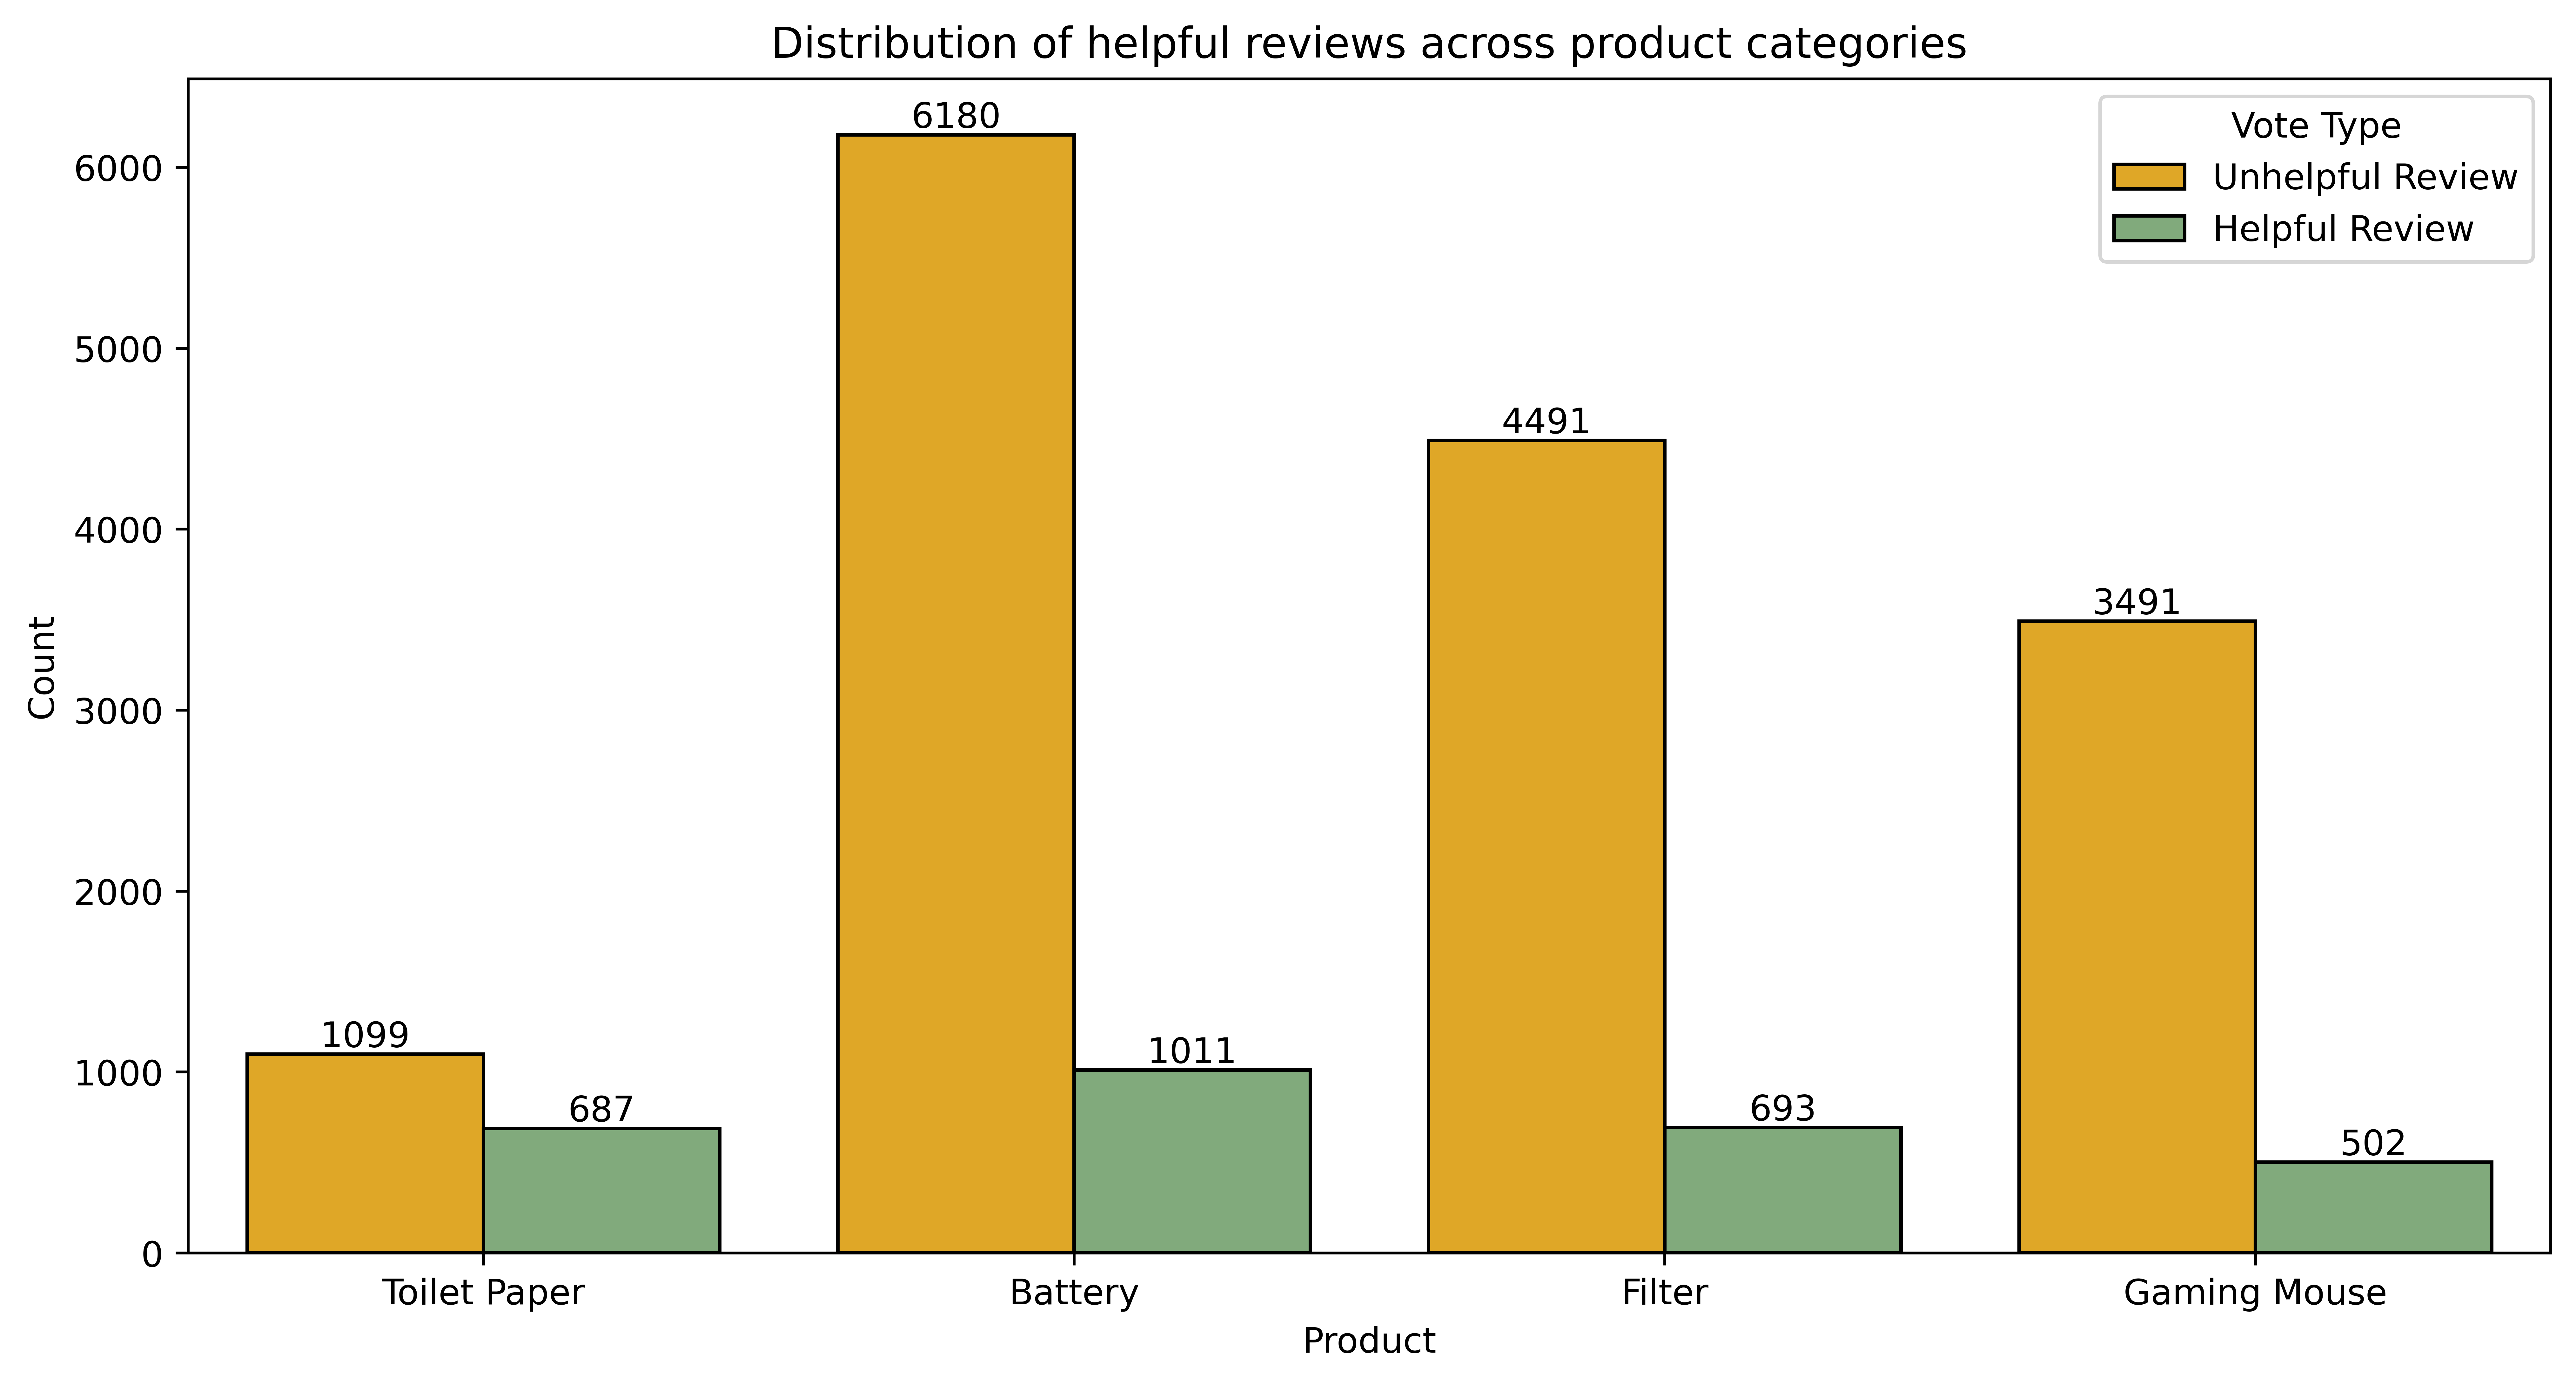

In [9]:
# Showing the distribution of helpful/unhelpful reviews across product categories : Hedonic and Utilitarian by product
plot_votes_by_product_type (data_hedonic_raw)
plot_votes_by_product_type (data_utilitarian_raw)


## 2.1 Statistic for Helpfulness Analysis 
In the following different methods for statistical evaluation of the helpful votes are conducted. 

In [10]:
# Descriptive Helpfulness Analysis for Data grouped by product 
review_counts_data = calculate_review_counts (data, 'Prod')
print(review_counts_data)

#Saving to CSV
review_counts_data.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/3 Data Analysis/Results/Overview/DataTotal_Review_Counts_Prod.csv', index=False)

           Prod  Unhelpful Reviews  Helpful Reviews  Total Reviews  \
0   Video Games               1964              421           2385   
1  Facial Spray               4937             1365           6302   
2         Music               1351              394           1745   
3       Perfume               7090              934           8024   
4  Toilet Paper               1099              687           1786   
5       Battery               6180             1011           7191   
6        Filter               4491              693           5184   
7  Gaming Mouse               3491              502           3993   

   Helpful Review Ratio  Unhelpful Review Ratio  
0             17.651992               82.348008  
1             21.659791               78.340209  
2             22.578797               77.421203  
3             11.640080               88.359920  
4             38.465845               61.534155  
5             14.059241               85.940759  
6             13.36

In [41]:
# Define the mapping from old names to new names
name_mapping = {
    'Gaming Mouse': 'Gaming mouse',
    'Facial Spray': 'Facial spray',
    'Music': 'Music',
    'Perfume': 'Perfume',
    'Toilet Paper': 'Toilet paper',  # Note the different format
    'Battery': 'Battery',
    'Filter': 'Filter',
    'Video Games': 'Video games',
}

# Update the 'Prod' column based on the mapping
data['Prod'] = data['Prod'].replace(name_mapping)


## 2.2 Visualization

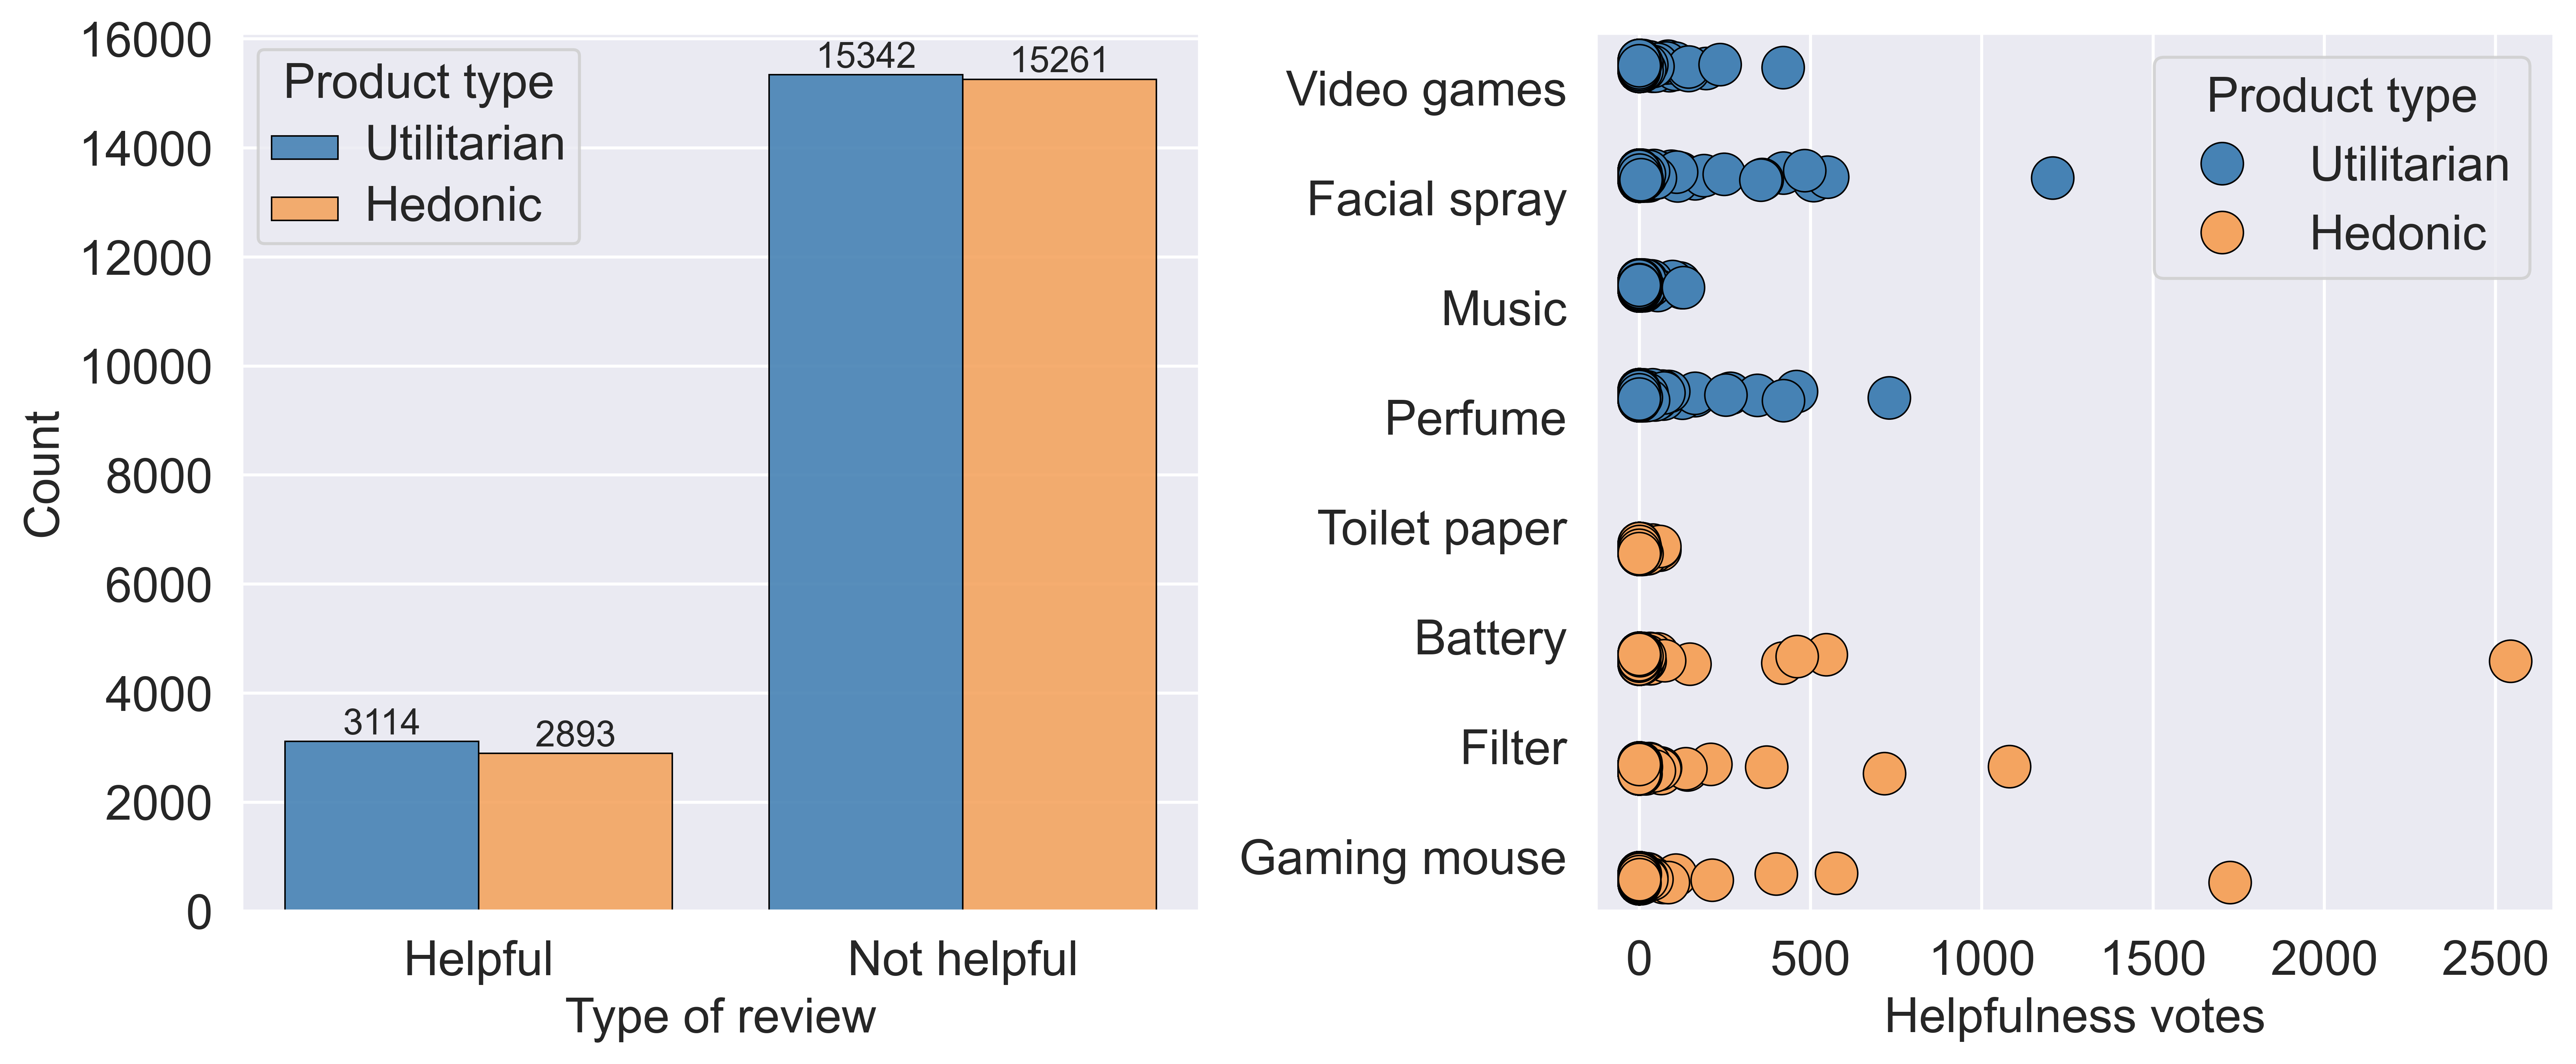

In [43]:
# Plotting distribution of helpful votes and helpful votes by product type
sns.set_theme(style='darkgrid')

# Creating helpful code for the data for that filterning the helpful votes
data['Helpful_Code'] = (data['helpful_vote'] > 0).astype(int)
data['Helpful_Code'] = data['Helpful_Code'].map({1: 'Helpful', 0: 'Not helpful'})

# Create subplots without shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=600)

# Plot 1: Histogram of "Helpful_Code" by Product Type
help_plot = sns.histplot(data=data, x='Helpful_Code', hue='Product type', multiple='dodge', stat='count', ax=axes[0],
                         alpha=0.9, shrink=0.8, palette={'Utilitarian': 'steelblue', 'Hedonic': 'sandybrown'}, edgecolor="black",linewidth=0.5,common_norm=False)
axes[0].set_xlabel('Type of review', fontsize=16)
axes[0].set_ylabel('Count', fontsize=16)
axes[0].tick_params(axis='both', labelsize=16)
axes[0].xaxis.grid(False)


# Calculate the counts and annotate the bars
counts = data.groupby(['Helpful_Code', 'Product type']).size().unstack().fillna(0)
for container in help_plot.containers:
    labels = [f'{int(value.get_height()):d}' for value in container]
    help_plot.bar_label(container, labels=labels, fontsize=12, label_type='edge')

# Plot 2: Stripplot of "helpful_votes" by Product ID and Product Type
prod_plot = sns.stripplot(x='helpful_vote', y='Prod', hue='Product type', data=data,
                          palette={'Utilitarian': 'steelblue', 'Hedonic': 'sandybrown'},size=14, jitter=True, dodge=True, ax=axes[1], orient='h',linewidth=0.5, edgecolor='black')
axes[1].set_xlabel('Helpfulness votes', fontsize=16)
axes[1].set_ylabel('', fontsize=16)
axes[1].tick_params(axis='both', labelsize=16)
axes[1].legend(fontsize=16, title='Product type', title_fontsize=16)

# Adjusting Plot Style
plt.setp(help_plot.get_legend().get_texts(), fontsize='16')  # for legend text
plt.setp(help_plot.get_legend().get_title(), fontsize='16')  # for legend title

plt.setp(prod_plot.get_legend().get_texts(), fontsize='16')  # for legend text
plt.setp(prod_plot.get_legend().get_title(), fontsize='16')  # for legend title

# Adjust layout to avoid overlap and save the plot
plt.tight_layout()
plt.savefig('Helpfulness', dpi=800)
plt.show()

# 2. Helpfulness test with T-Test 
In the next section the analysis of hepfulness distribution in both product types is conducted.

In [12]:
# Testing for normality of helpful votes using the Shapiro-Wilk test 
from scipy.stats import shapiro

# Example for helpful votes in the hedonic group
statistic_ratio, p_value1 = shapiro(data['helpful_ratio'])
statistic_helpfulV, p_value2 = shapiro(data['helpful_vote'])
#statistic_helpfulC, p_value3 = shapiro(data['Helpful_Code'])

print(f"Shapiro-Wilk test for normality of helpful votes: statistic = {statistic_ratio}, p-value = {p_value1}")
print(f"Shapiro-Wilk test for normality of helpful ratio: statistic = {statistic_helpfulV}, p-value = {p_value2}")
#print(f"Shapiro-Wilk test for normality of helpful Code: statistic = {statistic_helpfulC}, p-value = {p_value3}")

Shapiro-Wilk test for normality of helpful votes: statistic = 0.023725807666778564, p-value = 0.0
Shapiro-Wilk test for normality of helpful ratio: statistic = 0.018472790718078613, p-value = 0.0


/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [13]:
# Function for calculating summary statistics by group

def summary_statistic(df, groupby_column):
    numerical_columns = ['helpful_vote','Helpful_Code']

    summary_stats = df.groupby(groupby_column)[numerical_columns].agg(['mean', 'std'])

    summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]

    summary_stats = summary_stats.transpose()

    return summary_stats

In [15]:
# Calculating the summary statistics for the data grouped by product type for helpfulness variables
data['Helpful_Code'] = (data['helpful_vote'] > 0).astype(int)

data_stats = summary_statistic(data, 'Product type')

print(data_stats)

Product type         Hedonic  Utilitarian
helpful_vote_mean   0.978132     1.083333
helpful_vote_std   26.459371    15.983420
Helpful_Code_mean   0.159359     0.168726
Helpful_Code_std    0.366020     0.374520


In [16]:
from scipy.stats import ttest_ind

# Perform t-test for Helpful_votes
t_statistic_votes, p_value_votes = ttest_ind(data_utilitarian_raw['helpful_vote'], data_hedonic_raw['helpful_vote'], equal_var=False, alternative='greater')

# Perform t-test for Helpfulness_Code (assuming it's a binary variable)
t_statistic_classification, p_value_classification = ttest_ind(data_utilitarian_raw['Helpful_Code'], data_hedonic_raw['Helpful_Code'], equal_var=False,alternative='greater')

# Print results
print(f"One-Sided t-test results for Helpful_votes: t-statistic = {t_statistic_votes}, p-value = {p_value_votes}")
print(f"One-Sided t-test results for Amount of Helpful Reviews (Helpful_Code): t-statistic = {t_statistic_classification}, p-value = {p_value_classification}")


One-Sided t-test results for Helpful_votes: t-statistic = -0.4595476349866331, p-value = 0.6770778446344825
One-Sided t-test results for Amount of Helpful Reviews (Helpful_Code): t-statistic = -2.420138819714113, p-value = 0.9922402905102387


In [17]:
from scipy.stats import ttest_ind

# Perform one-sided two-sample t-test for helpful votes (assuming normality)
t_statistic_votes, p_value_votes = ttest_ind(data_utilitarian_raw['helpful_vote'], data_hedonic_raw['helpful_vote'], equal_var=False, alternative='two-sided')

# Perform one-sided two-sample t-test for Helpfulness_Code (assuming it's a binary variable)
t_statistic_classification, p_value_classification = ttest_ind(data_utilitarian_raw['Helpful_Code'], data_hedonic_raw['Helpful_Code'], equal_var=False, alternative='two-sided')

# Print results
print(f"Two-Sided t-test results for Helpful_votes: t-statistic = {t_statistic_votes}, p-value = {p_value_votes}")
print(f"Two-Sided t-test results for Amount of Helpful Reviews (Helpful_Code): t-statistic = {t_statistic_classification}, p-value = {p_value_classification}")


Two-Sided t-test results for Helpful_votes: t-statistic = -0.4595476349866331, p-value = 0.645844310731035
Two-Sided t-test results for Amount of Helpful Reviews (Helpful_Code): t-statistic = -2.420138819714113, p-value = 0.015519418979522574


In [21]:
# Function for calculating summary statistics by group for Mann-Whitney U test, which is a non-parametric test and included the median and standard deviation

def summary_statistic_mann(df, groupby_column):
    numerical_columns = ['helpful_vote','Helpful_Code']

    summary_stats = df.groupby(groupby_column)[numerical_columns].agg(['median', 'std'])

    summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]

    summary_stats = summary_stats.transpose()

    return summary_stats

data_stats_whitney = summary_statistic_mann(data, 'prod_type')


# Mann-Whitney U test for Helpful Votes and Helpfulness Ratio for non-normal data
import pandas as pd
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test for Helpful_votes
u_statistic_votes, p_value_votes = mannwhitneyu(data_hedonic_raw['helpful_vote'], data_utilitarian_raw['helpful_vote'])

# Perform Mann-Whitney U test for Helpfulness_Ratio
u_statistic_classification, p_value_classification = mannwhitneyu(data_hedonic_raw['Helpful_Code'], data_utilitarian_raw['Helpful_Code'])


# Print results
print(f"Mann-Whitney U test results for Helpful_votes: U = {u_statistic_votes}, p-value = {p_value_votes}")
print(f"Mann-Whitney U test results for Amount of Helpful Reviews: U = {u_statistic_classification}, p-value = {p_value_classification}")

print (data_stats_whitney)

Mann-Whitney U test results for Helpful_votes: U = 169168543.0, p-value = 0.011602458871853778
Mann-Whitney U test results for Amount of Helpful Reviews: U = 169094286.0, p-value = 0.015541028929657044
prod_type                    0         1
helpful_vote_median   0.000000   0.00000
helpful_vote_std     26.459371  15.98342
Helpful_Code_median   0.000000   0.00000
Helpful_Code_std      0.366020   0.37452
